In [20]:
%matplotlib inline
import nash
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import axes3d
sym.init_printing()


In [2]:
A = [[3,1],[0,2]]
B = [[2,1],[0,3]]

battle = nash.Game(A,B)
battle

Bi matrix game with payoff matrices:

Row player:
[[3 1]
 [0 2]]

Column player:
[[2 1]
 [0 3]]

In [3]:
x=0.5
y=0.1

a = np.array([[2,-2],[-1,100]])
b = -a

sig_r = np.array([x,1-x])
sig_c = np.array([y,1-y])

tmp_a = np.dot(sig_r,a)
tmp_b = np.dot(sig_r,b)
exp_a = np.dot(tmp_a,sig_c)
exp_b = np.dot(tmp_b,sig_c)

In [4]:
print(exp_a,exp_b)

44.15 -44.15


In [5]:
a2 = np.array([[1,-1],[-3,1]])
b2 = np.array([[1-1,2],[1,-1]])

In [6]:
r=(.2,.8)
c=np.array((.6,.4))

print("player a:",np.dot(r,np.dot(a2,c)))
print("player b:",np.dot(r,np.dot(b2,c)))

player a: -1.08
player b: 0.32


In [7]:
r=(.3,.7)
c=(.2,.8)
print("player a:",np.dot(r,np.dot(a2,c)))
print("player b:",np.dot(r,np.dot(b2,c)))

player a: -0.04
player b: 0.06


In [8]:
r=(.9,.1)
c=(.5,.5)
print("player a:",np.dot(r,np.dot(a2,c)))
print("player b:",np.dot(r,np.dot(b2,c)))

player a: -0.1
player b: 0.9


--------------
## CW Proposal

Creating a visual representation of [best responses and nash equilibria](https://vknight.org/gt/chapters/04/); looking into 2d spaces in detail and how this could be expanded into 3d.

From the syntax in the notes it is shown that we can represent a stratergy space, $S$, of a player as $\sigma_r = (x,1-x)$ or $\sigma_c = (y,1-y)$ depending on if were talking about a row player or a column player repectivly. In this example we will be looking at both players at the same time and discussing how we identify the best moves for each.

For example, we are playing as the row player and will have play off matrix $A$ and a set of stratergies $\sigma_r = (x,1-x)$. If we are given the mixed stratergy $\sigma_c = (y,1-y)$ how can we visualise the expected utility of our stratergy $(x,1-x)$ more effectivly? Depending on what is selected for $y$ we want to see what its like for given values of $x$.

This leads to the construction of a function of 2 variables to describe how a players expected utility can change. it can also visually show where on the plane the nash equlibria is and what it "looks" like. We can look at this for a veriety of games (and possibly building an interactive tool); For example lets take the example of the adjusted matching pennies game:

$$A=
\begin{pmatrix}
2 & -2 \\
-1 & 1
\end{pmatrix}
\quad
B=
\begin{pmatrix}
-2 & 2 \\
1 & -1
\end{pmatrix}
$$
And we also have 

$$\sigma_r = (x,1-x) \quad \sigma_c = (y,1-y)$$

The expected utility or the row player, $u_r$ is given as:
$$u_r=\sigma_r A \sigma_c^T$$
or:
$$
\begin{align}
u_r & = 
\begin{pmatrix}
x & 1-x
\end{pmatrix} 
\begin{pmatrix}
2 & -2 \\
-1 & 1
\end{pmatrix} 
\begin{pmatrix}
y\\
1-y
\end{pmatrix}\\ 
    & = [3x−1−3x+1] \begin{pmatrix}
y\\
1-y
\end{pmatrix} \\
    & = y(3x−1)+(−3x+1)(−y+1)\\
    & = 6xy−3x−2y+1
\end{align}$$

Using this we can then plot what this looks like using a 2d heatmap with the players expected utility coloured depending on what their opponent may do:

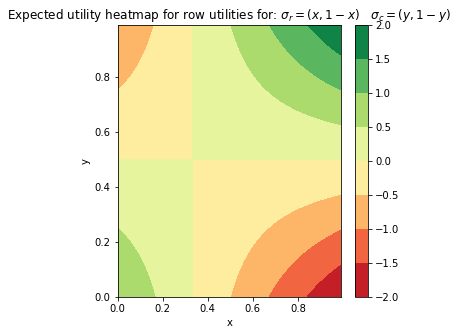

In [219]:
x=np.arange(0,1,0.01)
y=np.arange(0,1,0.01)
X,Y=np.meshgrid(x,y)


def coin_flip_row_utility(x,y):
    return 6*x*y-3*x-2*y+1

plt.figure(figsize=(5,5))
plt.contourf(X,Y,coin_flip_row_utility(X,Y),cmap='RdYlGn')
plt.colorbar()
plt.title("Expected utility heatmap for row utilities for: $\sigma_r=(x,1-x) \quad \sigma_c=(y,1-y)$")
plt.xlabel("x")
plt.ylabel("y")

For example here we can see that of the opponent plays with $\sigma_c=(y,1-y)=(0,1)$ it is obvious that 

----------------

In [202]:
x, y = sym.symbols('x, y')
a,b,c,d = sym.symbols('a, b, c, d')
# A = sym.Matrix([[a,b],[c,d]])
A = sym.Matrix([[2,-2],[-1,1]])
sigma_r = sym.Matrix([[x, 1-x]])
sigma_c = sym.Matrix([y, 1-y])
((sigma_r * A) *sigma_c).expand()

In [157]:
a, b = sym.symbols('a, b')
A = sym.Matrix([[2, -2], [-1, 1]])
B = - A
sigma_r = sym.Matrix([[a, 1-a]])
sigma_c = sym.Matrix([b, 1-b])
res=(sigma_r * A *  sigma_c)[0]
funct = sym.lambdify((x,y), res)

In [158]:
res.subs([(x,1),(y,1)])

In [159]:
funct(1,1)

In [160]:
def getExpression(M):
    a, b = sym.symbols('a, b')
    A = sym.Matrix(M)
    sigma_r = sym.Matrix([[a, 1-a]])
    sigma_c = sym.Matrix([b, 1-b])
    res=(sigma_r * A *  sigma_c)[0]
    funct = sym.lambdify((a,b), res)
    return funct

def f2(x,y,M):
    funct = getExpression(M)
    return funct(x,y)

In [163]:
print("old",f(X,Y))
print("new",f2(X,Y,[[-2,2],[1,-1]]))

old [[ 1.      0.97    0.94   ..., -1.91   -1.94   -1.97  ]
 [ 0.98    0.9506  0.9212 ..., -1.8718 -1.9012 -1.9306]
 [ 0.96    0.9312  0.9024 ..., -1.8336 -1.8624 -1.8912]
 ..., 
 [-0.94   -0.9118 -0.8836 ...,  1.7954  1.8236  1.8518]
 [-0.96   -0.9312 -0.9024 ...,  1.8336  1.8624  1.8912]
 [-0.98   -0.9506 -0.9212 ...,  1.8718  1.9012  1.9306]]
new [[-1.     -0.97   -0.94   ...,  1.91    1.94    1.97  ]
 [-0.98   -0.9506 -0.9212 ...,  1.8718  1.9012  1.9306]
 [-0.96   -0.9312 -0.9024 ...,  1.8336  1.8624  1.8912]
 ..., 
 [ 0.94    0.9118  0.8836 ..., -1.7954 -1.8236 -1.8518]
 [ 0.96    0.9312  0.9024 ..., -1.8336 -1.8624 -1.8912]
 [ 0.98    0.9506  0.9212 ..., -1.8718 -1.9012 -1.9306]]


In [169]:
A = 
B=-A

In [1]:
# Assuming a zero sum game
A = np.array([[-2,1],[1,-1]])
B = np.array([[3,1],[1,4]])
print("A is given as")
print(A)

plt.figure(figsize=(5,5))
plt.subplot(121)
plt.contourf(X,Y,f2(X,Y,A),cmap='RdYlGn')
plt.colorbar()
plt.title("Expected utility heatmap for row utilities for: $\sigma_r=(x,1-x) \quad \sigma_c=(y,1-y)$")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(122)
plt.contourf(X,Y,f2(X,Y,B),cmap='RdYlGn')
plt.colorbar()
plt.title("Expected utility heatmap for col utilities for: $\sigma_r=(x,1-x) \quad \sigma_c=(y,1-y)$")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()


NameError: name 'np' is not defined

In [ ]:
plt.contourf(X,Y,f(X,Y),cmap='RdYlGn')
plt.colorbar()
plt.title("Expected utility heatmap for row utilities for: $\sigma_r=(x,1-x) \quad \sigma_c=(y,1-y)$")
plt.xlabel("x")
plt.ylabel("y")
print("B is given as")
print(B)